## Classifying Fashion-MNIST

In [5]:
import torch
from torchvision import datasets, transforms
import helper

In [6]:
# define transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download and load the train data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

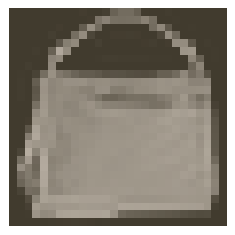

In [7]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [8]:
from torch import nn, optim
import torch.nn.functional as F

In [9]:
# define the network architecture
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim = 1)
        
        return x

In [10]:
model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [11]:
# define loss
criterion = nn.NLLLoss()
# define optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.003)

In [13]:
# train the network
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # forward pass
        log_ps = model(images)
        # calculate the loss
        loss = criterion(log_ps, labels)
        
        # to zero the gradient
        optimizer.zero_grad()
        # backpropagation
        loss.backward()
        # take a step with the optimizer
        optimizer.step()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")        
        

Training Loss: 0.8236631550260191
Training Loss: 0.4775005333236794
Training Loss: 0.4319090660669402
Training Loss: 0.4071206247437992
Training Loss: 0.39201453204221054


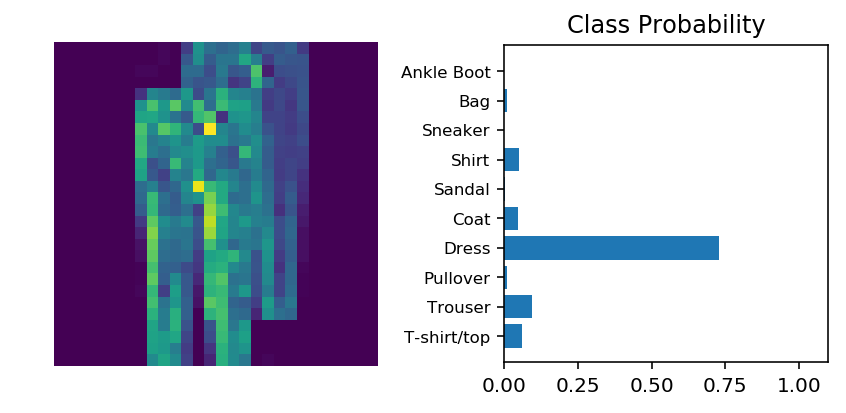

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test your network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# calculate the class probabilities
ps = torch.exp(model(img))

# plot the image and probabilities
helper.view_classify(img, ps, version = 'Fashion')